In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import graphene_old as graphene
from quant_met.configuration import Configuration
from quant_met import plotting

In [2]:
lattice_constant = np.sqrt(3)

basis = 0.5 * lattice_constant * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

bz_area = np.linalg.norm(np.cross(basis[0], basis[1]))
print(bz_area)

2.5980762113533156


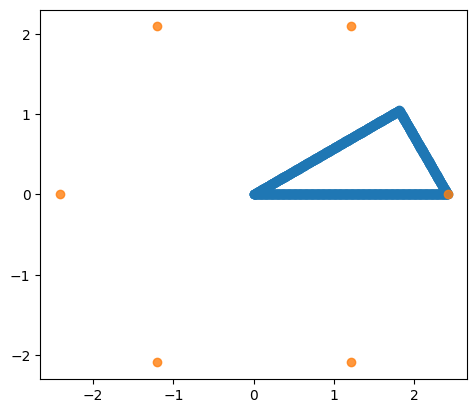

In [4]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

BZ_path_plot = plotting.plot_into_bz(all_K_points, band_path)

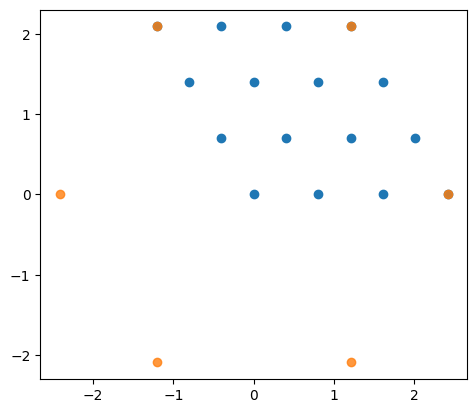

In [8]:
BZ_grid = graphene.generate_k_space_grid(4, 4, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

In [9]:
import time

config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=3, U_X=1, V=2, mu=-1.0, beta=1000000)

start = time.time()
delta = graphene.solve_gap_equation(config, BZ_grid)
print(delta)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
delta_interpolated = graphene.interpolate_gap(delta, whole_path)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

for delta, ax in zip(delta.data[['delta_1', 'delta_2']].to_numpy().T, axs):
#for delta, ax in zip([delta, delta], axs):
    ax.set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

[[[-0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
  [ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]]

 [[-0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
  [ 0.70710678-3.22497983e-18j -0.70710678+3.22497983e-18j]]

 [[-0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
  [ 0.70710678-4.28158367e-17j -0.70710678+4.28158367e-17j]]

 [[-0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
  [ 0.58828175-3.92332232e-01j -0.58828175+3.92332232e-01j]]

 [[-0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
  [ 0.70710678-3.10038970e-17j -0.70710678+3.10038970e-17j]]

 [[-0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
  [ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]]

 [[-0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
  [ 0.69636424-1.22787804e-01j -0.69636424+1.22787804e-01j]]

 [[-0.70710678+0.00000000e+00j -0.70710678+0.00000000e+00j]
  [ 0.35355339-6.12372436e-01j -0.35355339+6.12372436e-01j]]

 [[-0.70710678+0.0000000

NameError: name 'whole_path' is not defined

In [28]:
delta_over_U = []

U_range = np.linspace(start=0, stop=6, num=10)

for U in U_range:
    config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=U, U_X=2.2, V=2, mu=-2, beta=100000, filling=0.98)

    start = time.time()
    #try:
    #delta, mu = graphene.solve_gap_equation(config, BZ_grid)
    delta = graphene.solve_gap_equation(config, BZ_grid)
    #print(delta)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    #print(f"mu = {mu}")
    delta_over_U.append(delta.data.loc[0, 'delta_1'])
    #delta_over_U.append(delta)
    #except RuntimeError:
    #    delta_over_U.append(0)

Time taken to solve the gap equation: 0.80 seconds
Time taken to solve the gap equation: 19.32 seconds
Time taken to solve the gap equation: 9.54 seconds
Failed
Time taken to solve the gap equation: 116.51 seconds
Time taken to solve the gap equation: 42.20 seconds
Time taken to solve the gap equation: 1.17 seconds
Time taken to solve the gap equation: 0.93 seconds
Time taken to solve the gap equation: 1.17 seconds
Time taken to solve the gap equation: 1.44 seconds
Time taken to solve the gap equation: 1.63 seconds


Text(0.5, 0, 'U/t')

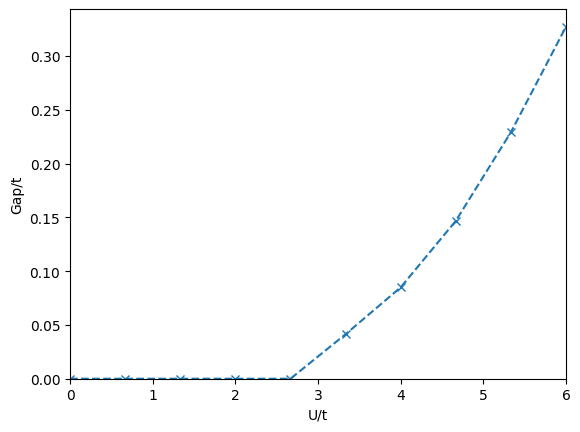

In [29]:
plt.plot(U_range, np.abs(delta_over_U), 'x--')
#plt.plot(U_range, np.array(U_range) / 2, alpha=0.5, color='black')
#plt.plot(U_range, np.array(U_range) - 2.13, alpha=0.5, color='black')
plt.ylim(bottom=0)
plt.xlim(left=0, right=6)
plt.ylabel("Gap/t")
plt.xlabel("U/t")

Text(0.5, 1.0, '$V = 2, \\mu = -1.0$')

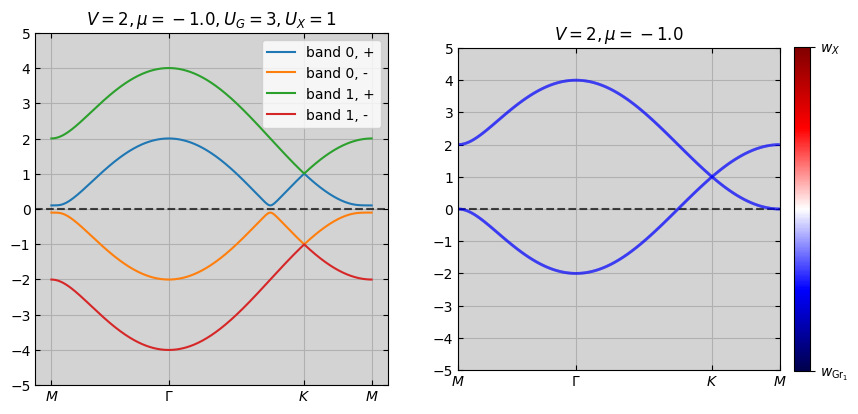

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

energies_on_bandpath, _ = graphene.generate_bloch(whole_path, config)

plotting.plot_bcs_bandstructure(energies_on_bandpath.T, delta_interpolated.data[['delta_1', 'delta_2']].to_numpy().T, whole_path_plot, ticks, labels, fig, axs[0])
axs[0].set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")

band_structure = graphene.calculate_bandstructure(config, whole_path)
bands = band_structure[['band_1', 'band_2']].to_numpy().T
overlaps = band_structure[['wx_1', 'wx_2']].to_numpy().T
plotting.plot_nonint_bandstructure(bands, overlaps, whole_path_plot, ticks, labels, fig, axs[1])
axs[1].set_title(f"$V = {config.V}, \\mu = {config.mu}$")